# Data Analysis
===================================================================================================

# Import Libraries

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns; sns.set()

# for plotting missing values
import missingno as msno

# for Splitting train/test sets
from sklearn.model_selection import train_test_split

# for bringing external data
import pickle



# to display all the columns of the dataframe in the notebook & all float numbers rounded to 2digits
pd.pandas.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# Load and split data (into train and test sets)

In [2]:
raw_data = pd.read_csv('scraped_data_used_cars.csv')
print('Raw data shape:', raw_data.shape)
raw_data.head(3)

Raw data shape: (62970, 12)


,Model,Prices,Years,Brand,Kms,Fuel,Emiss_CO2,Cons_litres_100km,Transmission,Doors,Power_CV,Seats
0,Scenic TCe 160 FAP Intens,21250.00,2019.00,Renault,9500.00,Essence,136.00,6.00,Manuelle,4.00,9.00,5.00
1,NaN,NaN,NaN,NaN,NaN,NaN,158.00,NaN,NaN,NaN,NaN,NaN
2,Coccinelle Cabriolet 1.4 TSI 160 Vintage,22000.00,1974.00,Volkswagen,100000.00,Essence,165.00,6.80,Manuelle,2.00,9.00,4.00


In [3]:
raw_data.duplicated().sum()

13845

In [4]:
data = raw_data.drop_duplicates()
data.shape

(49125, 12)

In [5]:
# Splitting into train & test sets to avoid data leakage
train_set, test_set = train_test_split(data, test_size = 0.1, random_state = 42) 
train_set.to_csv('train_data_custChurners.csv', index = False)
test_set.to_csv('test_data_custChurners.csv', index = False)

In [6]:
print(f'The train set contains {train_set.shape[0]} rows and {train_set.shape[1]} columns.')
print(f'The test set contains {test_set.shape[0]} rows and {test_set.shape[1]} columns.')

The train set contains 44212 rows and 12 columns.
The test set contains 4913 rows and 12 columns.


===================================================================================================
# Analysis
===================================================================================================

In [7]:
df = train_set.copy()

# 1. Target

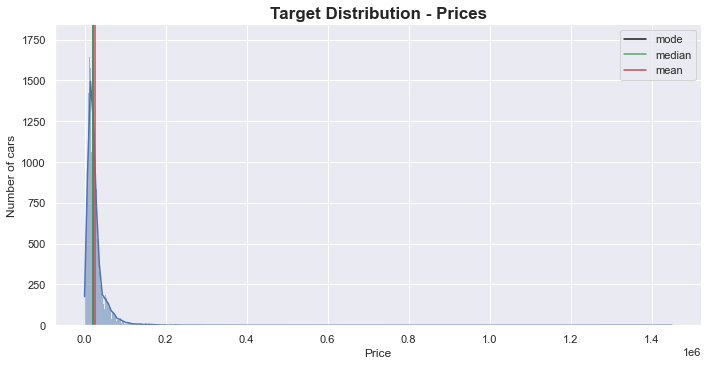

In [8]:
# histogram to evaluate target distribution
prices = df['Prices']

median = prices.median()
mean = prices.mean()
mode = prices.mode()[0]

sns.displot(data = prices, kde = True, color = 'b', aspect = 2)

plt.axvline(x=mode, ymin=0, ymax=2500, color='k', label='mode')
plt.axvline(x=median, ymin=0, ymax=2500, color='g', label='median')
plt.axvline(x=mean, ymin=0, ymax=2500, color='r', label='mean')

plt.title('Target Distribution - Prices', weight = 'bold', size = 17)
plt.ylabel('Number of cars')
plt.xlabel('Price')

plt.legend()
plt.show()

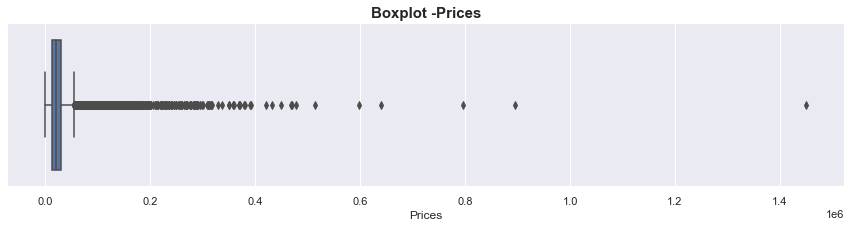

In [9]:
plt.figure(figsize = (15,3))
sns.boxplot(x = prices)
plt.title('Boxplot -Prices', weight = 'bold', size = 15)
plt.show()

In [10]:
df[(df['Prices'] > 600000)]['Prices']

51996    640000.00
46286    895000.00
51942   1450000.00
51978    795900.00
Name: Prices, dtype: float64

Outliers could be present in the test set as, although rare, there are very expensive and very cheap cars being sold. 

However, prices above 400,000€ are extremely rare and prices below 500€ could disturb patterns as they are probably just wanting to negotiate with the person buying. Therefore, outliers should not be excluded, but prices below 500€ and above 400,000€ should be considered as errors/anomalies.

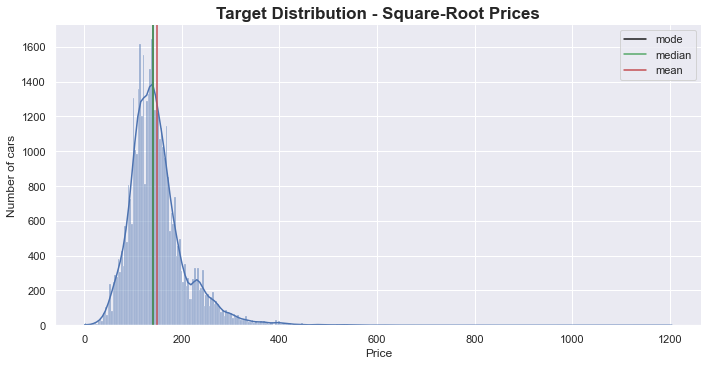

In [11]:
# histogram to evaluate target distribution
prices = df['Prices']
prices = np.sqrt(prices)


median = prices.median()
mean = prices.mean()
mode = prices.mode()[0]

sns.displot(data = prices, kde = True, color = 'b', aspect = 2)

plt.axvline(x=mode, ymin=0, ymax=2500, color='k', label='mode')
plt.axvline(x=median, ymin=0, ymax=2500, color='g', label='median')
plt.axvline(x=mean, ymin=0, ymax=2500, color='r', label='mean')

plt.title('Target Distribution - Square-Root Prices', weight = 'bold', size = 17)
plt.ylabel('Number of cars')
plt.xlabel('Price')

plt.legend()
plt.show()

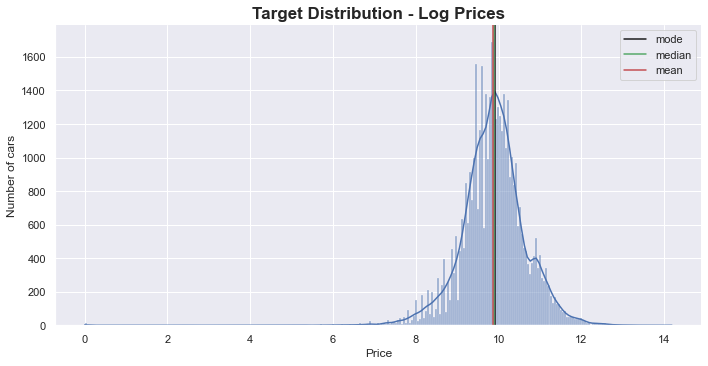

In [12]:
# histogram to evaluate target distribution
prices = df['Prices']
prices = np.log(prices)


median = prices.median()
mean = prices.mean()
mode = prices.mode()[0]

sns.displot(data = prices, kde = True, color = 'b', aspect = 2)

plt.axvline(x=mode, ymin=0, ymax=2500, color='k', label='mode')
plt.axvline(x=median, ymin=0, ymax=2500, color='g', label='median')
plt.axvline(x=mean, ymin=0, ymax=2500, color='r', label='mean')

plt.title('Target Distribution - Log Prices', weight = 'bold', size = 17)
plt.ylabel('Number of cars')
plt.xlabel('Price')

plt.legend()
plt.show()

It seems that after both the Log-transformation and the Square-Root transformation, the target gets a more bell-shaped distribution, which could help for future regressions.

# 2. Variables Types

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44212 entries, 41332 to 27506
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              37668 non-null  object 
 1   Prices             43752 non-null  float64
 2   Years              43868 non-null  float64
 3   Brand              43872 non-null  object 
 4   Kms                43887 non-null  float64
 5   Fuel               41699 non-null  object 
 6   Emiss_CO2          11158 non-null  float64
 7   Cons_litres_100km  7668 non-null   float64
 8   Transmission       40356 non-null  object 
 9   Doors              42134 non-null  float64
 10  Power_CV           40899 non-null  float64
 11  Seats              37839 non-null  float64
dtypes: float64(8), object(4)
memory usage: 4.4+ MB


In [14]:
# Identify the categorical variables
cat_vars = [var for var in df.columns if df[var].dtype == 'O']

print(f'There are {len(cat_vars)} categorical features:\n{cat_vars}')

There are 4 categorical features:
['Model', 'Brand', 'Fuel', 'Transmission']


In [15]:
# Identify the categorical variables
num_vars = [var for var in df.columns if var not in cat_vars and var != 'Prices']

# number of numerical variables
print(f'There are {len(num_vars)} numerical features:\n{num_vars}')

There are 7 numerical features:
['Years', 'Kms', 'Emiss_CO2', 'Cons_litres_100km', 'Doors', 'Power_CV', 'Seats']


# 3. Missing Values

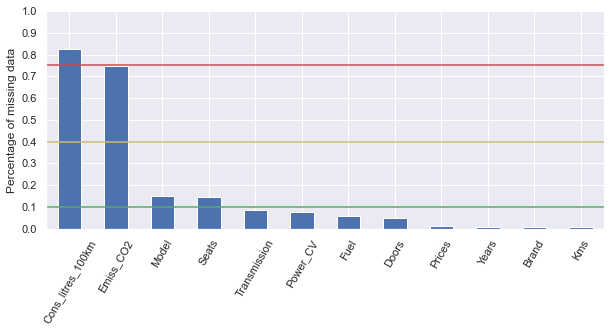

In [16]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# plot % of missing values
df[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10, 4))

plt.ylabel('Percentage of missing data')
plt.axhline(y=0.75, color='r', linestyle='-')
plt.axhline(y=0.40, color='y', linestyle='-')
plt.axhline(y=0.10, color='g', linestyle='-')

plt.yticks(np.arange(0,1.01,0.1))
plt.xticks(rotation = 60)
plt.show()

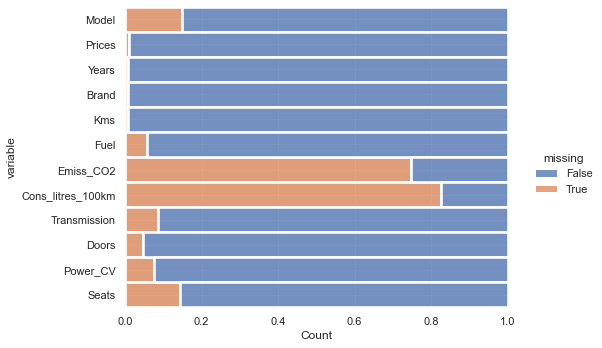

In [17]:
sns.displot(
           data = df.isna().melt(value_name = 'missing'),
           y = 'variable',
           hue = 'missing',
           multiple = "fill",
           aspect = 1.5)
plt.show()

Cons_litres_100km & Emiss_CO2 contain a majority of null values, thus it could be better to drop them. Indeed, to keep them one should either reduce the (train) dataset to the lowest number of non-null values (loosing the majority of the data), or impute values (mean, median, iterative imputer, etc.) which would make them contain a majority of artificial values and therefore would not be representative.

Moreover, the rows where "Price" is unknown should be dropped, as it is the target value.

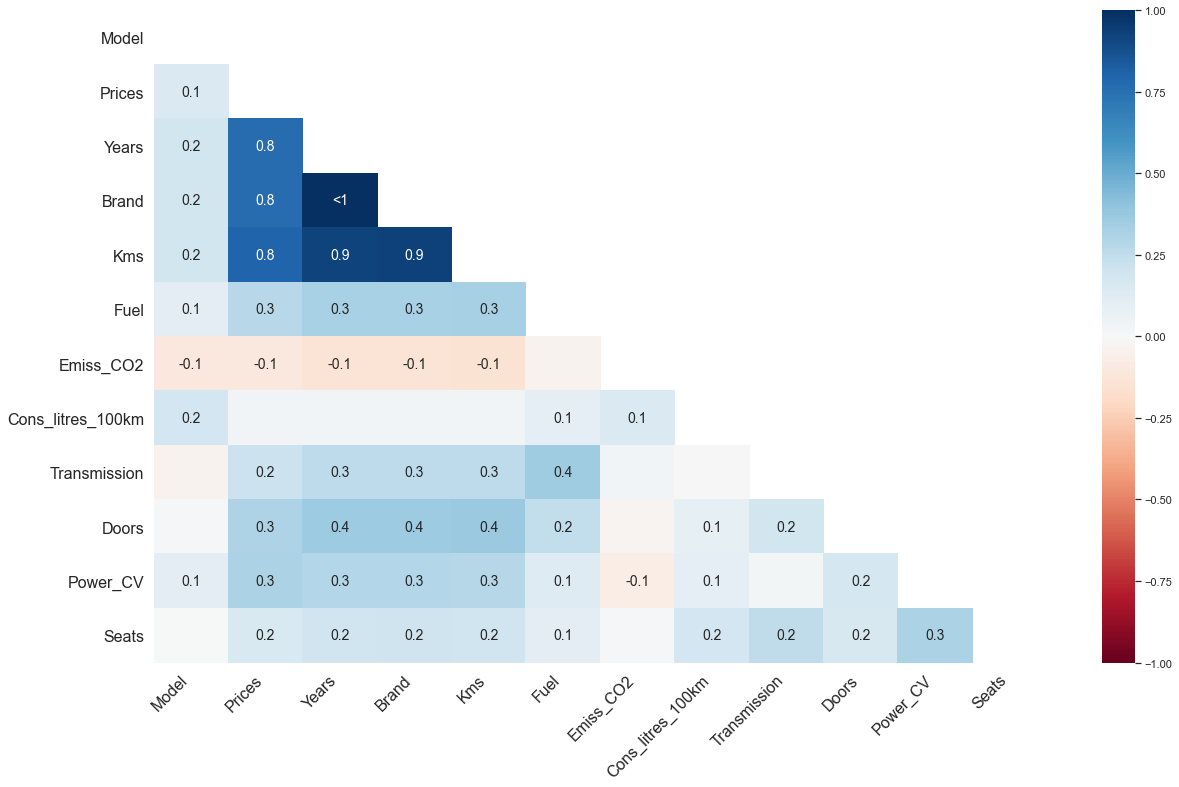

In [18]:
msno.heatmap(df)
plt.show()

"*Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).*"
(https://github.com/ResidentMario/missingno)

Variables do not seem to have a negative effect on the number of missing data of other features. The only correlations that are seen are positive: for some features, their presence is correlated with the appearance of other features.

In [19]:
def analyse_na_value(data, var):
    df = data.copy()

    # let's make an interim variable that indicates 1 if the observation was missing --0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the median SalePrice in the observations where data is missing vs the observations where data is available

    # determine the median price in the groups 1 and 0, and the standard deviation of the sale price,
    # and we capture the results in a temporary dataset
    tmp = df.groupby(var)['Prices'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Price", color='green')

    plt.show()

In [20]:
# Checking how many values are missing from Target
df.Prices.isnull().sum()

460

In [21]:
vars_with_na.remove('Prices')

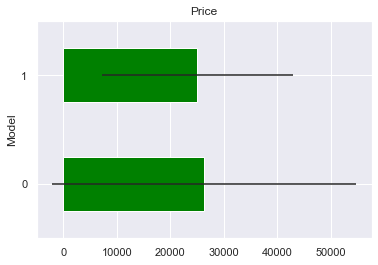

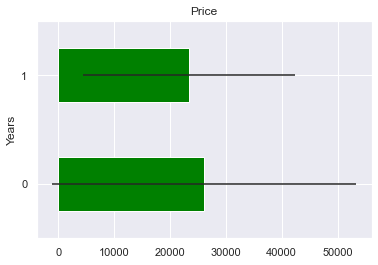

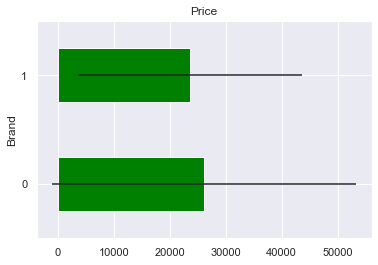

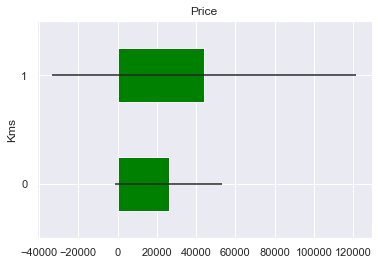

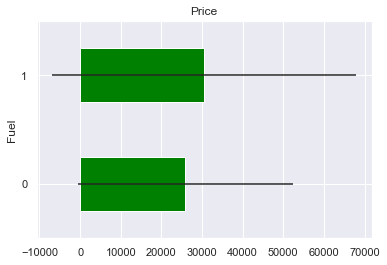

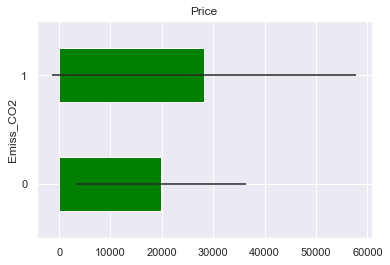

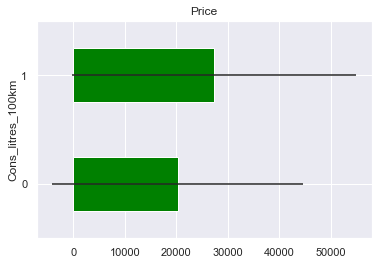

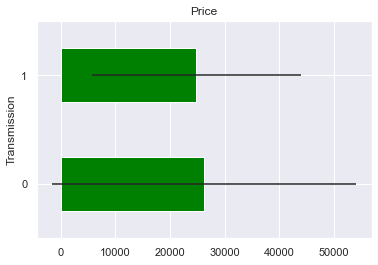

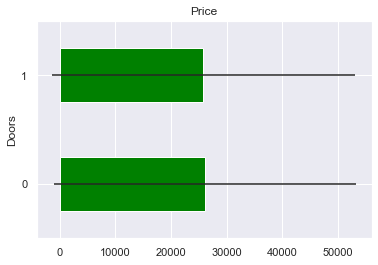

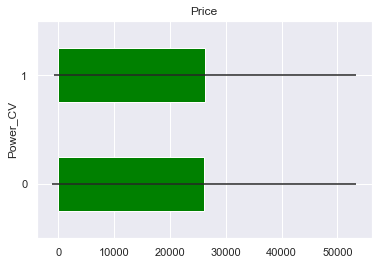

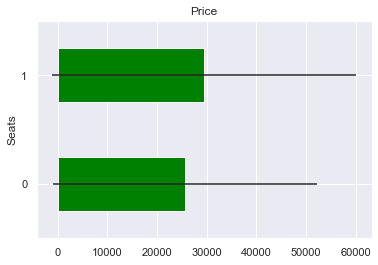

In [22]:
# Run the function on each variable with missing data
for var in vars_with_na:
    analyse_na_value(df, var)

Although, in some variables the average car price is higher/lower when data is missing, the confidence intervals overlap, which leads to believe that for most variables, there is no real difference. 

In [23]:
df[(df['Kms'].isnull()) & (df['Prices']>0) ]

,Model,Prices,Years,Brand,Kms,Fuel,Emiss_CO2,Cons_litres_100km,Transmission,Doors,Power_CV,Seats
39580,Clio Estate dCi 75 E6C Business,12500.00,2018.00,Renault,NaN,Diesel,NaN,4.00,Manuelle,4.00,4.00,5.00
1299,NEMO HDI 75 FAP BUSINESS,5200.00,2012.00,Citroën,NaN,Diesel,137.00,4.70,Manuelle,4.00,5.00,2.00
3230,C3 BlueHDi 100 79g Confort Business,8500.00,2015.00,Citroën,NaN,Diesel,124.00,3.00,Manuelle,4.00,4.00,5.00
6280,2008 PureTech 100 S&S BVM6 Active,21900.00,2020.00,Peugeot,NaN,Essence,118.00,4.60,Manuelle,4.00,6.00,5.00
38347,T-Cross 1.0 TSI 110 Start/Stop DSG7 Carat,30875.00,2022.00,Volkswagen,NaN,Essence,NaN,NaN,NaN,5.00,6.00,5.00
22240,NaN,3000.00,2006.00,Jaguar,NaN,Diesel,259.00,NaN,Manuelle,2.00,NaN,NaN
28977,NaN,2480.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52020,Carrera 4S Coupé 3.0i 450 PDK /,165000.00,7650.00,Porsche,NaN,Essence,NaN,NaN,Automatique,2.00,3.00,2.00
55676,Brera 2.4 JTDm 200 QTronic,7500.00,NaN,NaN,NaN,Diesel,NaN,7.90,Automatique,2.00,1.00,4.00
59674,996 Coupé Carrera 4 3.4 i 301 cv,26990.00,2000.00,Porsche,NaN,Essence,NaN,NaN,NaN,NaN,NaN,NaN


However, there is very few data missing the "Kms" feature, and no major pattern seem to exist between these rows. Thus, there is probably no relationship between the missing feature and other features.



# 4. Numerical variables

In [24]:
# explore the numerical variables
print('Number of numerical variables: ', len(num_vars))

df[num_vars].head()

Number of numerical variables:  7


,Years,Kms,Emiss_CO2,Cons_litres_100km,Doors,Power_CV,Seats
41332,2019.00,64790.00,NaN,5.20,4.00,4.00,5.00
23781,2021.00,3013.00,116.00,NaN,4.00,7.00,5.00
62241,2018.00,33500.00,NaN,NaN,5.00,5.00,5.00
54000,2016.00,43500.00,NaN,NaN,4.00,5.00,5.00
37751,2020.00,15166.00,NaN,NaN,4.00,5.00,5.00


In [25]:
df[num_vars].describe()

,Years,Kms,Emiss_CO2,Cons_litres_100km,Doors,Power_CV,Seats
count,43868.00,43887.00,11158.00,7668.00,42134.00,40899.00,37839.00
mean,2016.67,60722.86,136.64,6.51,3.93,4.89,8.93
std,29.05,59379.30,55.33,11.18,0.82,2.37,660.22
min,3.00,1.00,0.00,0.00,2.00,1.00,2.00
25%,2015.00,17738.50,108.00,4.30,4.00,4.00,5.00
50%,2018.00,45800.00,124.00,5.00,4.00,5.00,5.00
75%,2020.00,88785.50,149.00,6.00,4.00,7.00,5.00
max,7650.00,3330000.00,2018.00,100.00,7.00,9.00,125000.00


There seem to be some outliers/errors in "Years" and in "Seats"

In [26]:
df[(df.Years < 1800) | (df.Years > 2022)]

,Model,Prices,Years,Brand,Kms,Fuel,Emiss_CO2,Cons_litres_100km,Transmission,Doors,Power_CV,Seats
5040,1.4 TCE 130CH DYNAMIQUE {2009/09 - 2012/01},NaN,2023.00,Renault,188000.00,NaN,117.00,NaN,Manuelle,2.00,NaN,NaN
52020,Carrera 4S Coupé 3.0i 450 PDK /,165000.00,7650.00,Porsche,NaN,Essence,NaN,NaN,Automatique,2.00,3.00,2.00
33328,NEW PureTech 110 BV6 SHINE GPS Caméra Park Assist,22380.00,3.00,Citroën,7500.00,Essence,NaN,NaN,Manuelle,5.00,5.00,5.00


In [27]:
# dropping row with error values
idx = df[(df.Years < 1800) | (df.Years > 2022)].index
df.drop(idx, inplace = True)

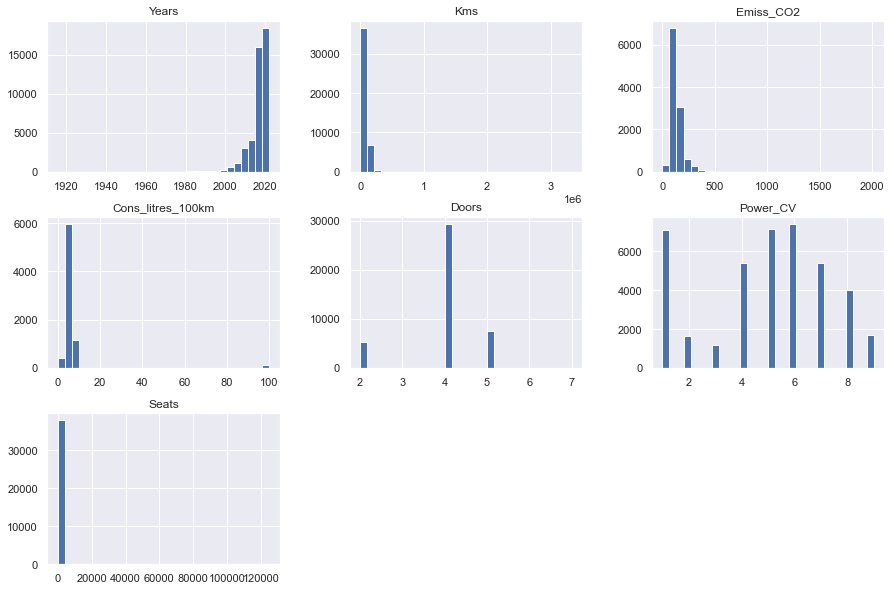

In [28]:
df[num_vars].hist(bins = 30, figsize = (15,10))
plt.show()

## Date variables

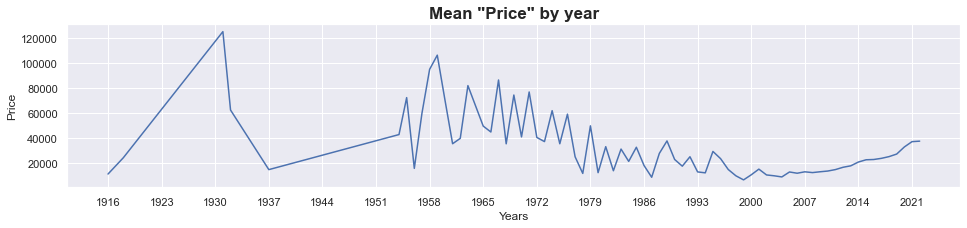

In [29]:
plt.figure(figsize = (16,3))
df.groupby('Years')['Prices'].mean().plot()
plt.title('Mean "Price" by year', weight = 'bold', size = 17)
plt.ylabel('Price')
plt.xticks(np.arange(min(df.Years), max(df.Years), 7))
plt.show()

In [30]:
df[df['Years'] < 1935]

,Model,Prices,Years,Brand,Kms,Fuel,Emiss_CO2,Cons_litres_100km,Transmission,Doors,Power_CV,Seats
52145,0.9L Prime 90 Cv Blanc Nacre,11490.00,1916.00,Smart,55600.00,Essence,NaN,NaN,Automatique,NaN,4.00,2.00
57332,5.7 V8 COUPE 3W,125000.00,1931.00,Ford,66320.00,Essence,NaN,NaN,Automatique,2.00,2.00,NaN
39568,Y TYPE HOTROD 5.3 L PONTIAC 320 CV,49990.00,1932.00,Ford,25700.00,Essence,NaN,NaN,Automatique,2.00,5.00,2.00
52146,GT 1.6L 225CV Blanc Nacre,24490.00,1918.00,Peugeot,34000.00,Essence,NaN,NaN,Automatique,NaN,1.00,5.00
57329,A V8 40,75000.00,1932.00,Ford,18521.00,Essence,NaN,NaN,Automatique,2.00,2.00,NaN


It seems that, on average, very old cars are the most expensive, but up to a certain threshold (around 1960s) their price start to decrease then price start to rise up again with newer cars (after 2000s).

## Continuous variables

In [31]:
cont_vars = [var for var in num_vars if len(df[var].unique()) > 20 and var != 'Years']
cont_vars

['Kms', 'Emiss_CO2', 'Cons_litres_100km']

In [32]:
pos_cont_vars = [var for var in cont_vars if df[var].isin([0]).sum() == 0]
pos_cont_vars

['Kms']

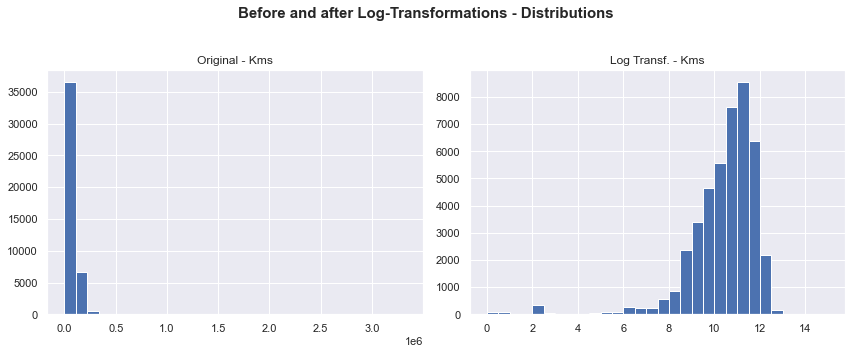

In [33]:
temp1 = df.copy()

for var in pos_cont_vars:
    # transform the variable with logarithm
    temp1[var] = np.log(df[var])
    

# Plotting new distributions
fig, axs = plt.subplots(1, 2, figsize = (12,5), tight_layout = True)
fig.suptitle('Before and after Log-Transformations - Distributions\n', weight = "bold", size = 15)   
for var in pos_cont_vars:
    # Before transformation
    axs[0].set_title(f'Original - {var}')
    axs[0].hist(df[var], bins = 30)
    
    # Log transformation
    axs[1].set_title(f'Log Transf. - {var}')
    axs[1].hist(temp1[var], bins = 30)
    
    continue
    
    plt.show()

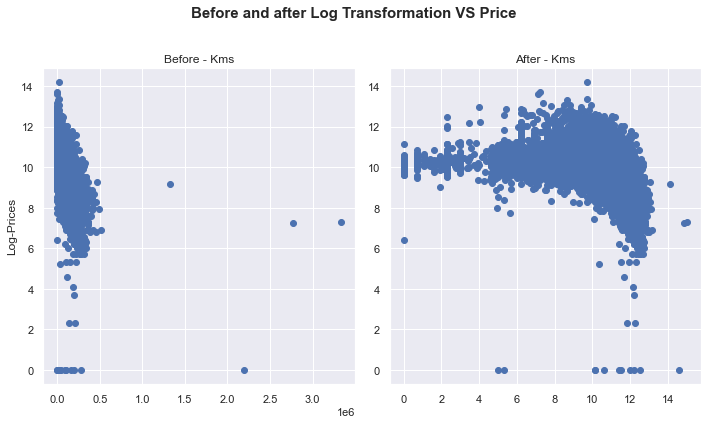

In [34]:
# Original & Transformed variables VS SalePrice to see if there is a relationship
fig, axs = plt.subplots(len(pos_cont_vars), 2, figsize = (10,6), tight_layout = True)
fig.suptitle('Before and after Log Transformation VS Price\n', weight = "bold", size = 15)   
for var in pos_cont_vars:
    # Before transformation
    axs[0].set_title(f'Before - {var}')
    axs[0].set_ylabel('Log-Prices')
    axs[0].scatter(df[var], np.log(df['Prices']))
    
    # After transformation
    axs[1].set_title(f'After - {var}')
    axs[1].scatter(temp1[var], np.log(df['Prices']))
    
    continue
    
    plt.show()

The "Kms" feature seem to have a better spread after being log-transformed. This could later improve the model performance.

## Skewed variables

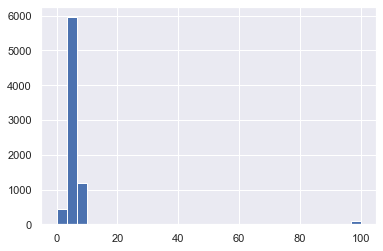

In [35]:
df.Cons_litres_100km.hist(bins = 30) 
plt.show()

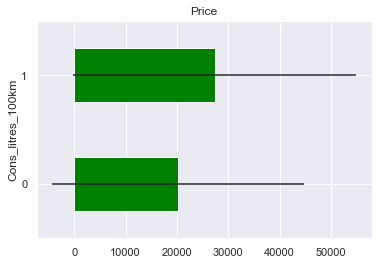

In [36]:
tmp = df.copy()
var = 'Cons_litres_100km'

# map the variable values into 0 and 1
tmp[var] = np.where(df[var] < 99, 0, 1)
    
# determine mean sale price in the mapped values
tmp = tmp.groupby(var)['Prices'].agg(['mean', 'std'])

# plot into a bar graph
tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Price", color='green')

plt.show()

There may be a difference in Price, but the confidence intervals overlap, so it is uncertain if it would have a predictive effect on the final model.

## Discrete variables

In [37]:
disc_vars = [var for var in num_vars if var not in cont_vars and var != 'Years']
disc_vars

['Doors', 'Power_CV', 'Seats']

In [38]:
df[df.Seats > 10]

,Model,Prices,Years,Brand,Kms,Fuel,Emiss_CO2,Cons_litres_100km,Transmission,Doors,Power_CV,Seats
3146,Rezzo 2.0 CDX,3500.00,2007.00,Chevrolet,125000.00,Essence,282.00,9.00,Manuelle,4.00,9.00,125000.00
24931,Clio IV TCe 90 Energy Business,9300.00,2015.00,Renault,29500.00,Essence,NaN,4.70,Manuelle,4.00,5.00,29500.00


In [39]:
seats_with_errors = df[df.Seats > 10]['Seats']
seats_with_errors

3146    125000.00
24931    29500.00
Name: Seats, dtype: float64

The number of seats seems to be an error. Two possible approaches would be to either drop these rows or to consider these values as missing values, as we do not know what are the real values. Since, the rows do not contain other missing values and the data seem robust (aside from the number of seats), the best approach to not lose too much data is to just replace the errors with missing values.

In [40]:
seats_with_errors = df[df.Seats > 10]['Seats'].values
df.Seats = df.Seats.replace(to_replace = seats_with_errors, value = np.nan)

Now we can visualize the discrete variables and their relationship with selling prices

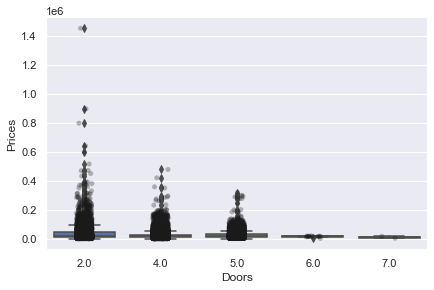

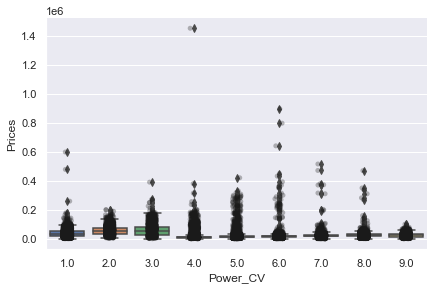

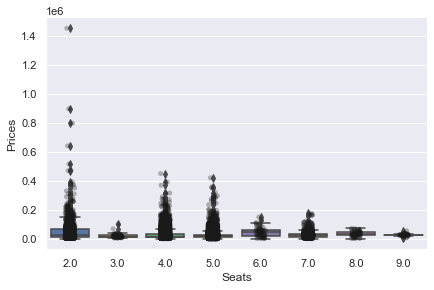

In [41]:
# Exploring the contribution of discrete variables to the house price
for var in disc_vars:
    # boxplot with catplot
    sns.catplot(x = var, y = 'Prices', data = df, kind="box", height = 4, aspect = 1.5)
    
    # adding datapoints to boxplot with stripplot
    sns.stripplot(x = var, y = 'Prices', data = df, jitter = 0.1, alpha = 0.3, color = 'k')
    
    plt.show()

There seem to be a certain relationship between these discrete features and price. However, they will probably not be the most important in the final model.

# 5. Categorical variables

In [42]:
# Exploring categorical features
print('Number of categorical variables: ', len(cat_vars))
df[cat_vars].head()

Number of categorical variables:  4


,Model,Brand,Fuel,Transmission
41332,Fiesta 1.1 70 ch BVM5 Trend Business Nav,Ford,Essence,Manuelle
23781,NaN,Peugeot,Diesel,Automatique
62241,1.0 TFSI 95ch ultra Ambition Luxe S tronic 7,Audi,Essence,Automatique
54000,1.2 PURETECH 110CH ALLURE S&S EAT6 5CV 5P,Peugeot,Essence,Automatique
37751,NaN,Renault,Essence,Manuelle


In [43]:
df.describe(include = 'O')

,Model,Brand,Fuel,Transmission
count,37665,43869,41697,40353
unique,27766,69,6,4
top,50 TDI,Renault,Diesel,Manuelle
freq,39,7197,20159,20690


In [44]:
# print categories that are present in less than 1 % of the observations
rare_perc = 0.01

for var in cat_vars:
    tmp = df.groupby(var)['Prices'].count() / len(df)
    rare_values = len(tmp[tmp < rare_perc])
    tot_values = df[var].nunique()
    print(f'"{var}" has {rare_values} values present less than {rare_perc*100}% --this is {round(rare_values/tot_values*100)}% of the classes in the feature') 

"Model" has 27766 values present less than 1.0% --this is 100% of the classes in the feature
"Brand" has 50 values present less than 1.0% --this is 72% of the classes in the feature
"Fuel" has 1 values present less than 1.0% --this is 17% of the classes in the feature
"Transmission" has 1 values present less than 1.0% --this is 25% of the classes in the feature


In [45]:
cat_vars_low_card = [var for var in cat_vars if df[var].nunique() < 60]
cat_vars_low_card

['Fuel', 'Transmission']

In [46]:
def plot_cat_vars_low_card(df, var):
    if var == 'Brand':
        sns.catplot(x=var, y='Prices', data=df, kind="box", height=5, aspect=3.1)
        plt.xticks(rotation = 90)
    else:
        sns.catplot(x=var, y='Prices', data=df, kind="box", height=5, aspect=1.7)
        
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='Prices', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

### Model

In [47]:
cars_once = sum(df.Model.value_counts() == 1)
tot_cars = len(df.Model)
perc_cars_once = round(cars_once/tot_cars*100,2)

print(f'{perc_cars_once}% of models appear only once in the dataset')

52.32% of models appear only once in the dataset


There is too much cardinality on the "Model" feature. A way to treat this feature would be to use frequency encoding to know which are the most popular models, but that can also be accomplished with brands. Moreover, doing so, could cause problems as most values seem to appear just once, thus, an important number of new models would probably be present in the test set.

Therefore, the most simple and safe approach is to simply drop this feature.

### Brand

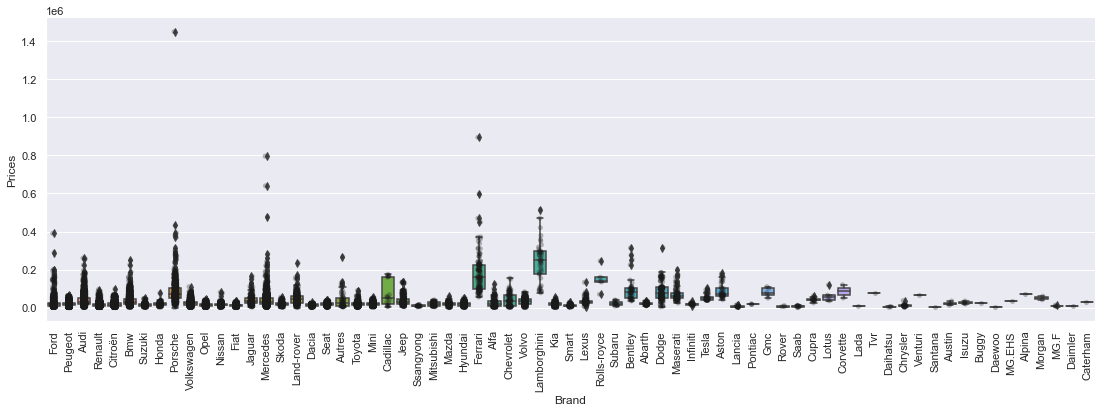

In [48]:
plot_cat_vars_low_card(df, 'Brand')

In [49]:
df.Brand.value_counts()

Renault    7197
Peugeot    6381
Citroën    3828
Bmw        3450
Audi       3207
           ... 
Tvr           1
Daewoo        1
MG.EHS        1
Buggy         1
Daimler       1
Name: Brand, Length: 69, dtype: int64

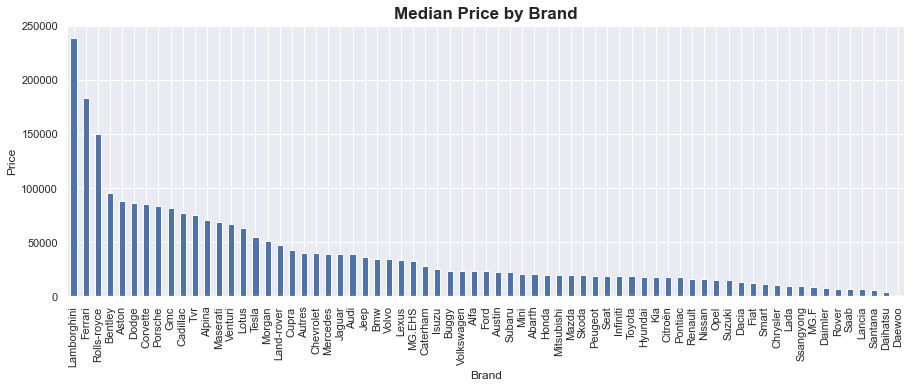

In [50]:
plt.figure(figsize = (15,5))
df.groupby('Brand')['Prices'].mean().sort_values(ascending = False).plot.bar()
plt.title('Median Price by Brand', weight = 'bold', size = 17)
plt.ylabel('Price')
plt.show()

The "Brand" feature has relatively high cardinality. To reduce it, brands could be regrouped by country of origin (ex.: Renault, Peugeot => France) by using external data. Moreover, the brand could also be translated into price categories (high end, luxury, low end, ...), as they seem to have a clear relationship with price. Finally, they could also be encoded by frequency to know if most popular brands have an impact on price.

In [51]:
with open("luxury_cars_list", "rb") as fp:   # Unpickling data scraped from 'https://luxatic.com/best-luxury-car-brands/'
    luxury_cars_list = pickle.load(fp)

luxury_cars_list

['lexus',
 'audi',
 'landrover',
 'genesis',
 'cadillac',
 'bmw',
 'jaguar',
 'mercedesbenz',
 'porsche',
 'lotuscars',
 'maserati',
 'pagani',
 'koenigsegg',
 'astonmartin',
 'ferrari',
 'mclaren',
 'lamborghini',
 'bentley',
 'bugatti',
 'rollsroyce']

In [52]:
luxury_cars_list.append('tesla')

In [53]:
colors = []
for car in df.groupby('Brand')['Prices'].mean().sort_values(ascending = False).index:
    # Quickly handling different writings present in "luxury_cars_list" 
    if (car == 'Rolls-royce') or (car == 'Mercedes') or (car == 'Land-rover') or (car == 'Aston'):
        colors.append('orange')
    else:
        if car.lower() in luxury_cars_list:
            colors.append('orange')
        else:
            colors.append('b')

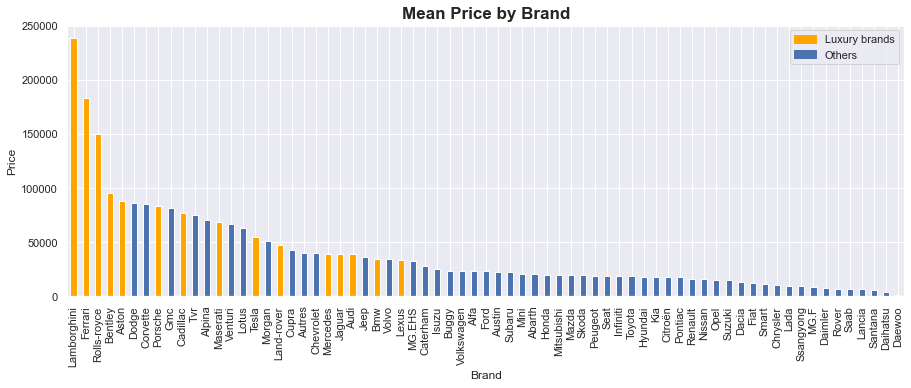

In [54]:
# https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend

plt.figure(figsize = (15,5))
df.groupby('Brand')['Prices'].mean().sort_values(ascending = False).plot.bar(color = colors)
plt.title('Mean Price by Brand', weight = 'bold', size = 17)
plt.ylabel('Price')

orange_patch = mpatches.Patch(color='orange', label='Luxury brands')
blue_patch = mpatches.Patch(color='b', label='Others')
plt.legend(handles=[orange_patch, blue_patch])

plt.show()

In [55]:
dict_lux_cars = {}
for car in df.Brand:
    if type(car) == str:
        if (car == 'Rolls-royce') or (car == 'Mercedes') or (car == 'Land-rover') or (car == 'Aston'):
            dict_lux_cars[car] = 1
        else:
            if car.lower() in luxury_cars_list:
                dict_lux_cars[car] = 1
            else:
                dict_lux_cars[car] = 0

In [56]:
df.Brand.map(dict_lux_cars).corr(df['Prices'])

0.41971305589903196

The new "luxury" brand feature seem to have a strong relationship with price, as expected.

### Brand-Country

In [57]:
df_car_origin = pd.read_csv('scraped_brands_per_country.csv') #scraped from https://en.wikipedia.org/wiki/List_of_car_brands
df_car_origin.head()

,argentina,australia,austria,azerbaijan,belgium,bosnia and herzegovina,brazil,bulgaria,canada,china,croatia,czech republic,denmark,egypt,estonia,ethiopia,finland,france,germany,greece,india,indonesia,iran,ireland,israel,italy,ivory coast,japan,kenya,liechtenstein,malaysia,mexico,mozambique,namibia,nepal,netherlands,new zealand,nigeria,north korea,norway,pakistan,poland,portugal,romania,russia,serbia,slovenia,south africa,south korea,spain,sweden,switzerland,syria,taiwan,thailand,tunisia,turkey,uganda,ukraine,united arab emirates,united kingdom,united states,uruguay,vietnam
0,zanella,alpha sports,eurostar automobilwerk,ga,ecar,pretis,abais,litex motors,electrameccanica,baic group,crobus,avia,pvp karting,egy-tech,nobe,holland car,elcat,aixam,ff,elvo,tejas motors,esemka,bahman,shamrock,ail,abarth,baby-brousse,aspark,mobius,orca,assal,autobuses king,matchedje motors owned by china tong jian in...,uri-automobile,hulas motors,donkervoort,almac,izuogu,pyeonghwa motors,kongsberg,atlas honda,arrinera,umm,dacia,derways,fca srbija,revoz,birkin,ct&t,aspid,volvo cars,mbm,sham car,cmc,akepanich,barkia,anadol,kiira,zaz,devel motors,ac cars,am general,nordex,chienthang
1,anasagasti,arrow,ktm,khazar,edran,tas,adamo gt,sin cars,htt,baolong,đuro đaković,bureko,zenvo automotive,speranza,NaN,NaN,electric raceabout,alpine,abt sportsline,kioleides,ashok leyland,pindad,diar,tmc costin,plasan,acm,NaN,daihatsu,nyayo,NaN,bufori,cimex,NaN,NaN,NaN,van doorne's automobiel fabrieken,alternative cars,innoson vehicle manufacturing,pyongsang auto works,bjering,honda atlas cars pakistan,fso,portaro,ford românia s.a.,gaz,zastava tervo,atax,harper sports cars,galloper,comarth,koenigsegg,monteverdi,NaN,formosa,c-fee,industries mécaniques maghrébines,devrim,NaN,NaN,shayton,arash,anteros,dellepiane,la dalat
2,andino,birchfield,magna steyr,naz,gillet,NaN,agrale,bulgaralpine,intermeccanica,beijing automotive industry holding corporation,dok-ing,gordon,anglo-dane,nasr,NaN,NaN,finlandia,bolloré,audi,korres,dc design,timor,iran khodro,alesbury,autocars,alfa romeo,NaN,datsun,NaN,NaN,proton,dina,NaN,NaN,NaN,spyker,chevron,NaN,sungri motors,buddy,faw pakistan,melex,NaN,oltcit,lada,ida-opel,tam,perana,genesis,cupra,polestar,ranger,NaN,luxgen,cherdchai,wallyscar,diardi,NaN,NaN,w motors,ariel,arcimoto,el terruno,thaco
3,asa,bolwell,öaf,aziz,imperia automobiles,NaN,americar,bulgarrenault,wingho,beijing automobile works,rimac,jawa,brems,NaN,NaN,NaN,korvensuu,bugatti,alpina,namco,eicher motors,NaN,khodro kaveer,gac ireland,kaiser-ilin industries,casalini,NaN,dome,NaN,NaN,perodua,fanasa,NaN,NaN,NaN,vencer,fraser,NaN,NaN,geijer,ghandhara nissan,polski fiat,NaN,aro,uaz,yugo,NaN,puma,hyundai,dsd design and motorsport,nevs,NaN,NaN,thunder power,deva,NaN,etox,NaN,NaN,zarooq motors,aston martin,aurica,grumett,vinfast
4,eniak,borland racing developments,puch,NaN,adk,NaN,amoritz gt,moskvitch,acadian,beijing automobile works,tvornica motora zagreb,kaipan,dansk,NaN,NaN,NaN,sisu auto,chatenet,artega,replicar hellas,force motors,NaN,kish khodro,NaN,NaN,cizeta,NaN,englon,NaN,NaN,td,grupo electrico motorizado,NaN,NaN,NaN,daf,hulme,NaN,NaN,norsk,ghandhara industries,NaN,NaN,NaN,zil,zastava,NaN,shaka,kia,gta motor,von braun holding company,NaN,NaN,tobe,kwaithong,NaN,evt s,NaN,NaN,NaN,bac,bollinger motors,guitolar,vinaxuki


In [58]:
dict_cars_origin = {}

for brand in set(df.Brand):
    if type(brand) == str:
        if len(df_car_origin[df_car_origin.isin([f'{brand.lower()}'])].stack()) > 0:
            dict_cars_origin[f'{brand}'] = df_car_origin[df_car_origin.isin([f'{brand.lower()}'])].stack().index[0][1]

In [59]:
dict_cars_origin

{'Dodge': 'united states',
 'Subaru': 'japan',
 'Venturi': 'france',
 'Nissan': 'japan',
 'Toyota': 'japan',
 'Saab': 'sweden',
 'Abarth': 'italy',
 'Santana': 'spain',
 'Rover': 'united kingdom',
 'Lada': 'russia',
 'Fiat': 'italy',
 'Ferrari': 'italy',
 'Mini': 'japan',
 'Tvr': 'united kingdom',
 'Chrysler': 'united states',
 'Infiniti': 'japan',
 'Isuzu': 'japan',
 'Lancia': 'italy',
 'Tesla': 'united states',
 'Gmc': 'united states',
 'Kia': 'south korea',
 'Renault': 'france',
 'Volkswagen': 'brazil',
 'Opel': 'germany',
 'Ford': 'united kingdom',
 'Alpina': 'germany',
 'Seat': 'spain',
 'Lamborghini': 'italy',
 'Ssangyong': 'south korea',
 'Daimler': 'united kingdom',
 'Cadillac': 'united states',
 'Hyundai': 'south korea',
 'Honda': 'japan',
 'Mazda': 'japan',
 'Lexus': 'japan',
 'Peugeot': 'france',
 'Suzuki': 'japan',
 'Dacia': 'romania',
 'Porsche': 'germany',
 'Bentley': 'united kingdom',
 'Bmw': 'germany',
 'Maserati': 'italy',
 'Jeep': 'united states',
 'Jaguar': 'united k

In [60]:
s1 = set(df.Brand)
s2 = set(dict_cars_origin.keys())

print(f'From a total of {df.Brand.nunique()} brands, {len(s1.difference(s2))} are missing:\n\t {s1.difference(s2)}')

From a total of 69 brands, 12 are missing:
	 {nan, 'Alfa', 'Skoda', 'Caterham', 'Corvette', 'MG.F', 'Land-rover', 'Volvo', 'Autres', 'Aston', 'Buggy', 'MG.EHS'}


In [61]:
dict_cars_origin['MG.EHS'] = 'united kingdom'
dict_cars_origin['Volvo'] = 'sweden'
dict_cars_origin['MG.F'] = 'united kingdom'
dict_cars_origin['MG.ZS'] = 'united kingdom'
dict_cars_origin['Aston'] = 'united kingdom'
dict_cars_origin['Skoda'] = 'czech republic'
dict_cars_origin['Buggy'] = 'other'
dict_cars_origin['Alfa'] = 'italy'
dict_cars_origin['Autres'] = 'other'
dict_cars_origin['Caterham'] = 'united kingdom'
dict_cars_origin['Land-rover'] = 'united kingdom'
dict_cars_origin['Corvette'] = 'united states'

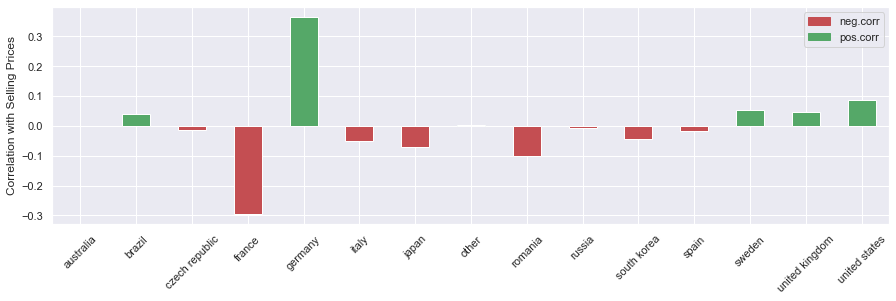

In [62]:
# Replacing "brands" by country of origin, one-hot encoding it (get_dummies) then joining the target value to get corr values
country_brands_price_corr = df['Brand'].replace(dict_cars_origin).str.get_dummies().join(df['Prices']).corr(method = 'spearman')['Prices']

# Plotting results
plt.figure(figsize= (15,4))
colors = ['r' if corr < 0 else 'g' for corr in country_brands_price_corr[:-1]]
country_brands_price_corr[:-1].plot.bar(color = colors)
plt.ylabel('Correlation with Selling Prices')
plt.xticks(rotation = 45)
red_patch = mpatches.Patch(color='r', label='neg.corr')
blue_patch = mpatches.Patch(color='g', label='pos.corr')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

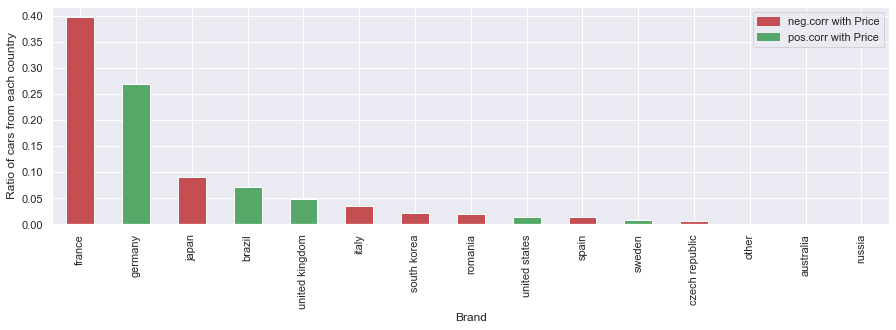

In [63]:
data = df['Brand'].replace(dict_cars_origin)
data_count = data.groupby(data).count().sort_values(ascending = False) 
data_count = data_count / data_count.sum()
dict_corr_country = {country:('r' if corr < 0 else 'g') 
                     for (country,corr) in country_brands_price_corr[:-1].to_dict().items()}


plt.figure(figsize = (15,4))
colors = [dict_corr_country.get(country) for country in data_count.index]
data_count.plot.bar(color = colors)
red_patch = mpatches.Patch(color='r', label='neg.corr with Price')
blue_patch = mpatches.Patch(color='g', label='pos.corr with Price')
plt.legend(handles=[red_patch, blue_patch])
plt.ylabel('Ratio of cars from each country')
plt.show()

It seems that the only countries that seem to have an impact on price are "France" and "Germany". French cars seem, on average, to sell at lower prices while german cars sell at higher prices. This makes sense, as the data came from a french website. Moreover, these are the two most frequent values found in the dataset (more than 40% of cars are from French brands & more than 20% of cars are from Germany brands).

Therefore, a good strategy could be to show if a car was made by a french brand, a german brand or a brand from another country.

### Fuel

In [64]:
df.Fuel.value_counts()

Diesel        20159
Essence       18332
Hybride        1793
Electrique      855
Autres          494
GPL ou GNL       64
Name: Fuel, dtype: int64

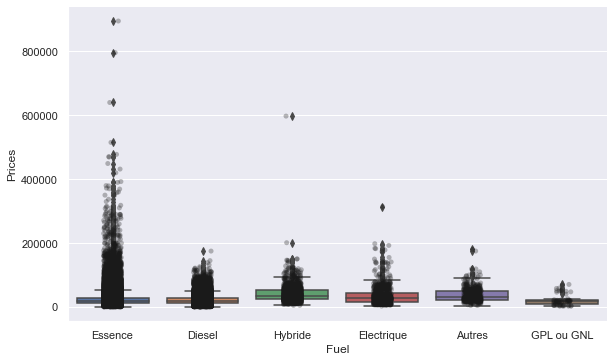

In [65]:
plot_cat_vars_low_card(df, 'Fuel')

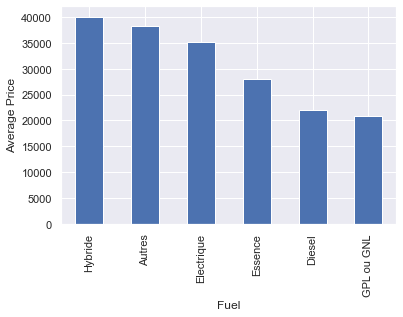

In [66]:
df.groupby('Fuel')['Prices'].mean().sort_values(ascending = False).plot.bar()
plt.ylabel('Average Price')
plt.show()

There are two strong classes: "Diesel" and "Essence", accounting for a large majority of the values. The other 4 are less frequent in the data and seem to have a higher average selling price, except for "GPL ou GNL" which also the least popular fuel.

### Transmission

In [67]:
df.Transmission.value_counts()

Manuelle            20690
Automatique         17456
Semi automatique     2030
Autres                177
Name: Transmission, dtype: int64

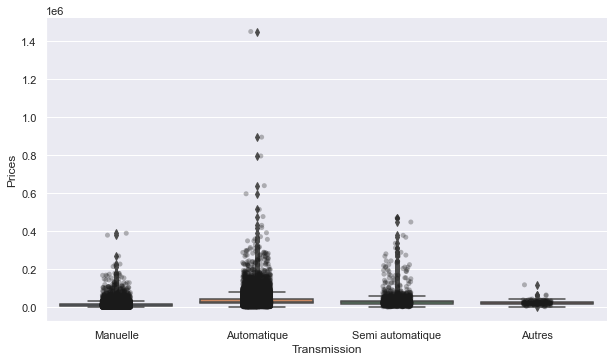

In [68]:
plot_cat_vars_low_card(df, 'Transmission')

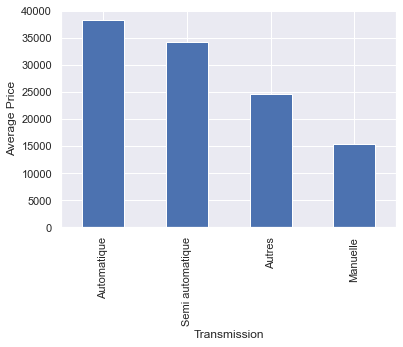

In [69]:
df.groupby('Transmission')['Prices'].mean().sort_values(ascending = False).plot.bar()
plt.ylabel('Average Price')
plt.show()

The two most popular classes are clearly "Manuelle" *(manual)* and "Automatique" *(automatic)*. Moreover, cars with manual transmission seem to have a lower average selling price with respect to the 3 other classes. 

Finally, "Semi automatique" and "Autres" *(others)* are poorly represented on the dataset and share a similar profile, therefore it could be reasonable to regroup them (which could lower dimensionality of the final dataset, which could help the future regression model).